<a href="https://colab.research.google.com/github/EmaMule/Computer-Vision/blob/main/data/GroundSemantic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
from PIL import Image
import requests
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc

In [ ]:
drive.mount('/content/drive')

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
dir_path = "/content/drive/MyDrive/CV Project/CVUSA/streetview"
image_names = os.listdir(dir_path)

image_paths = []
for image_name in image_names:
    image_path = os.path.join(dir_path, image_name)
    image_paths.append(image_path)

image_paths[0]

'/content/drive/MyDrive/CV Project/CVUSA/streetview/0040212.jpg'

In [ ]:
path = image_paths[0][0:51] + '0000194.jpg'
print(path)

/content/drive/MyDrive/CV Project/CVUSA/streetview/0000194.jpg


In [ ]:
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-mapillary-vistas-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-mapillary-vistas-semantic")

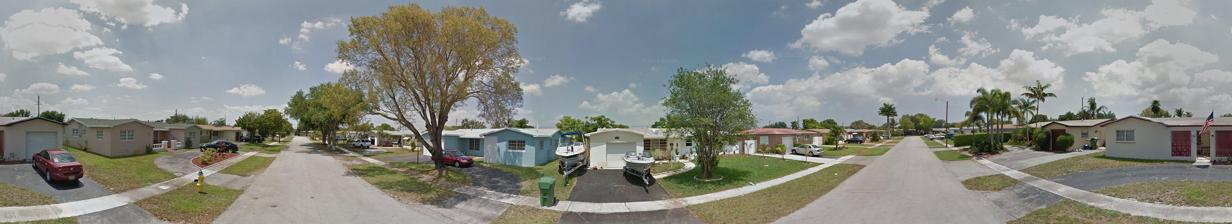

In [ ]:
image = Image.open(path)
image

In [ ]:
inputs = processor(images=image, return_tensors="pt")
for k,v in inputs.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 384, 384])
pixel_mask torch.Size([1, 384, 384])


In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

In [ ]:
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

In [ ]:
predicted_semantic_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])

In [ ]:
outputs.class_queries_logits

tensor([[[-5.6627, -6.4221, -1.2313,  ..., -4.4178, -4.7904,  7.8688],
         [-1.2812,  0.6973, -4.5998,  ..., -3.1969, -5.6930,  7.3959],
         [-3.4135, -4.2842, -3.2586,  ..., -4.7665, -4.6878,  7.0461],
         ...,
         [-1.6292,  0.2028, -1.6695,  ..., -3.2691, -2.6491,  6.4336],
         [-1.9538, -0.4888, -1.3740,  ..., -1.5501, -2.7374,  4.0648],
         [-3.5898, -4.5313, -3.3884,  ..., -4.5357, -5.3488,  6.9017]]])

In [ ]:
print(model.config.id2label)

{0: 'Bird', 1: 'Ground Animal', 2: 'Curb', 3: 'Fence', 4: 'Guard Rail', 5: 'Barrier', 6: 'Wall', 7: 'Bike Lane', 8: 'Crosswalk - Plain', 9: 'Curb Cut', 10: 'Parking', 11: 'Pedestrian Area', 12: 'Rail Track', 13: 'Road', 14: 'Service Lane', 15: 'Sidewalk', 16: 'Bridge', 17: 'Building', 18: 'Tunnel', 19: 'Person', 20: 'Bicyclist', 21: 'Motorcyclist', 22: 'Other Rider', 23: 'Lane Marking - Crosswalk', 24: 'Lane Marking - General', 25: 'Mountain', 26: 'Sand', 27: 'Sky', 28: 'Snow', 29: 'Terrain', 30: 'Vegetation', 31: 'Water', 32: 'Banner', 33: 'Bench', 34: 'Bike Rack', 35: 'Billboard', 36: 'Catch Basin', 37: 'CCTV Camera', 38: 'Fire Hydrant', 39: 'Junction Box', 40: 'Mailbox', 41: 'Manhole', 42: 'Phone Booth', 43: 'Pothole', 44: 'Street Light', 45: 'Pole', 46: 'Traffic Sign Frame', 47: 'Utility Pole', 48: 'Traffic Light', 49: 'Traffic Sign (Back)', 50: 'Traffic Sign (Front)', 51: 'Trash Can', 52: 'Bicycle', 53: 'Boat', 54: 'Bus', 55: 'Car', 56: 'Caravan', 57: 'Motorcycle', 58: 'On Rails',

In [ ]:
color_palette = [
    (255, 255, 196),  # Bird - Light Yellow
    (255, 255, 196),  # Ground Animal - Light Yellow
    (0, 0, 255),      # Curb - Blue
    (0, 128, 128),    # Fence - Teal
    (0, 196, 128),    # Guard Rail - Medium Green
    (196, 64, 64),    # Barrier - Medium Red
    (196, 64, 64),    # Wall - Medium Red
    (0, 0, 0),        # Bike Lane - Black
    (0, 0, 0),        # Crosswalk - Plain - Black
    (0, 0, 255),      # Curb Cut - Blue
    (0, 0, 0),        # Parking - Black
    (196, 128, 128),  # Pedestrian Area - Light Red
    (64, 64, 0),      # Rail Track - Olive
    (0, 0, 0),        # Road - Black
    (0, 0, 0),        # Service Lane - Black
    (255, 255, 0),    # Sidewalk - Yellow
    (0, 64, 0),       # Bridge - Dark Green
    (128, 128, 128),  # Building - Gray
    (0, 128, 0),      # Tunnel - Green
    (128, 0, 128),    # Person - Purple
    (128, 0, 128),    # Bicyclist - Purple
    (128, 0, 128),    # Motorcyclist - Purple
    (128, 0, 128),    # Other Rider - Purple
    (255, 255, 255),  # Lane Marking - Crosswalk - White
    (255, 255, 255),  # Lane Marking - General - White
    (128, 64, 0),     # Mountain - Brown
    (240, 230, 140),  # Sand - Khaki
    (135, 206, 235),  # Sky - Sky Blue
    (221, 242, 249),  # Snow - Light Blue
    (128, 128, 0),    # Terrain - Olive
    (0, 255, 0),      # Vegetation - Bright Green
    (0, 128, 255),    # Water - Medium Blue
    (128, 0, 0),      # Banner - Maroon
    (255, 192, 203),  # Bench - Pink
    (255, 192, 203),  # Bike Rack - Pink
    (128, 0, 0),      # Billboard - Maroon
    (196, 196, 0),    # Catch Basin - Yellow-Green
    (255, 192, 203),  # CCTV Camera - Pink
    (255, 192, 203),  # Fire Hydrant - Pink
    (255, 192, 203),  # Junction Box - Pink
    (255, 192, 203),  # Mailbox - Pink
    (196, 196, 0),    # Manhole - Yellow-Green
    (255, 192, 203),  # Phone Booth - Pink
    (0, 0, 0),        # Pothole - Black
    (255, 0, 255),    # Street Light - Fuchsia
    (255, 0, 255),    # Pole - Fuchsia
    (255, 0, 255),    # Traffic Sign Frame - Fuchsia
    (255, 0, 255),    # Utility Pole - Fuchsia
    (255, 0, 255),    # Traffic Light - Fuchsia
    (255, 0, 255),    # Traffic Sign (Back) - Fuchsia
    (255, 0, 255),    # Traffic Sign (Front) - Fuchsia
    (255, 192, 203),  # Trash Can - Pink
    (255, 128, 0),    # Bicycle - Orange
    (196, 64, 0),     # Boat - Dark Orange
    (255, 0, 0),      # Bus - Red
    (255, 0, 0),      # Car - Red
    (255, 0, 0),      # Caravan - Red
    (255, 128, 0),    # Motorcycle - Orange
    (196, 0, 64),     # On Rails - Dark Red
    (255, 0, 0),      # Other Vehicle - Red
    (255, 0, 0),      # Trailer - Red
    (255, 0, 0),      # Truck - Red
    (255, 0, 0),      # Wheeled Slow - Red
    (255, 0, 0),      # Car Mount - Red
    (255, 0, 0)       # Ego Vehicle - Red
]

# Print the color palette
for color in color_palette:
    print(color)


(255, 255, 196)
(255, 255, 196)
(0, 0, 255)
(0, 128, 128)
(0, 196, 128)
(196, 64, 64)
(196, 64, 64)
(0, 0, 0)
(0, 0, 0)
(0, 0, 255)
(0, 0, 0)
(196, 128, 128)
(64, 64, 0)
(0, 0, 0)
(0, 0, 0)
(255, 255, 0)
(0, 64, 0)
(128, 128, 128)
(0, 128, 0)
(128, 0, 128)
(128, 0, 128)
(128, 0, 128)
(128, 0, 128)
(255, 255, 255)
(255, 255, 255)
(128, 64, 0)
(240, 230, 140)
(135, 206, 235)
(221, 242, 249)
(128, 128, 0)
(0, 255, 0)
(0, 128, 255)
(128, 0, 0)
(255, 192, 203)
(255, 192, 203)
(128, 0, 0)
(196, 196, 0)
(255, 192, 203)
(255, 192, 203)
(255, 192, 203)
(255, 192, 203)
(196, 196, 0)
(255, 192, 203)
(0, 0, 0)
(255, 0, 255)
(255, 0, 255)
(255, 0, 255)
(255, 0, 255)
(255, 0, 255)
(255, 0, 255)
(255, 0, 255)
(255, 192, 203)
(255, 128, 0)
(196, 64, 0)
(255, 0, 0)
(255, 0, 0)
(255, 0, 0)
(255, 128, 0)
(196, 0, 64)
(255, 0, 0)
(255, 0, 0)
(255, 0, 0)
(255, 0, 0)
(255, 0, 0)
(255, 0, 0)


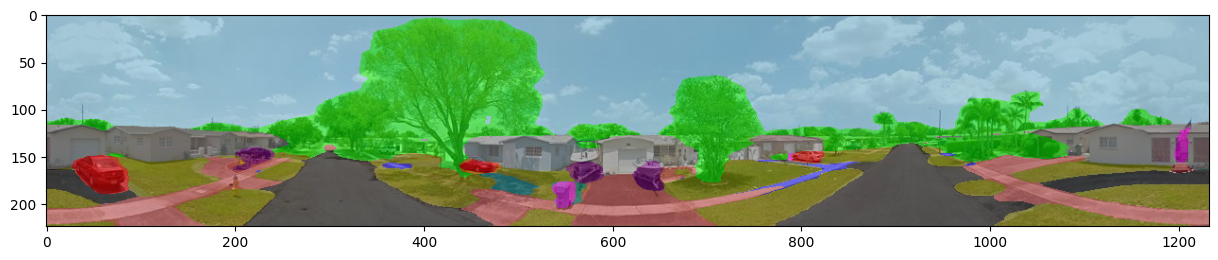

In [ ]:
seg = predicted_semantic_map[0]
color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8) # height, width, 3
palette = np.array(color_palette)
for label, color in enumerate(palette):
    color_seg[seg == label, :] = color

color_seg = color_seg[..., ::1]

# Show image + mask
img = color_seg * 0.5 + np.array(image)*0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [ ]:
def obtain_segmentation_map(model, img_path, sigma = 1.0):
        assert sigma <= 1 and sigma >= 0
        image = Image.open(img_path)
        inputs = processor(images=image, return_tensors="pt")
        with torch.no_grad():
          outputs = model(**inputs)
        predicted_semantic_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
        seg = predicted_semantic_map
        color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8) # height, width, 3
        palette = np.array(color_palette)
        for label, color in enumerate(palette):
            color_seg[seg == label, :] = color

        color_seg = color_seg[..., ::1]

        # Show image + mask
        semantic_img = color_seg * sigma + np.array(image)*(1-sigma)
        semantic_img= semantic_img.astype(np.uint8)
        return semantic_img

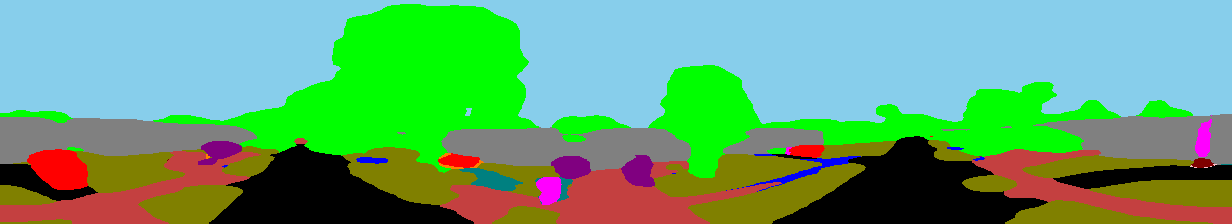

In [ ]:
Image.fromarray(obtain_segmentation_map(model, path, sigma = 1.0))

In [ ]:
target_dir_path = "/content/drive/MyDrive/CV Project/CVUSA/streetview_segmentation2"

if not os.path.exists(target_dir_path):
    os.makedirs(target_dir_path)

segmentation_paths = []
for image_name in image_names:
    image_path = os.path.join(target_dir_path, image_name)
    segmentation_paths.append(image_path)

In [ ]:
colored_depths = []

total_num = len(image_paths)

splits = [0, total_num//3, 2*total_num//3, total_num]

In [ ]:
# @title Ali

for i in tqdm(range(splits[0], splits[1])):
    if i % 200 == 0:
        gc.collect()
        torch.cuda.empty_cache()
    if not os.path.exists(segmentation_paths[i]):
        semantic_img = Image.fromarray(obtain_segmentation_map(model, image_paths[i], sigma = 1.0))
        semantic_img.save(segmentation_paths[i])

In [ ]:
# @title Emanuele

for i in tqdm(range(splits[1], splits[2])):
    if i % 200 == 0:
        gc.collect()
        torch.cuda.empty_cache()
    if not os.path.exists(segmentation_paths[i]):
        semantic_img = Image.fromarray(obtain_segmentation_map(model, image_paths[i], sigma = 1.0))
        semantic_img.save(segmentation_paths[i])

In [ ]:
# @title Matteo

for i in tqdm(range(splits[2], splits[3])):
    if i % 200 == 0:
        gc.collect()
        torch.cuda.empty_cache()
    if not os.path.exists(segmentation_paths[i]):
        semantic_img = Image.fromarray(obtain_segmentation_map(model, image_paths[i], sigma = 1.0))
        semantic_img.save(segmentation_paths[i])

  2%|▏         | 55/2954 [08:31<7:22:45,  9.16s/it]